5_best_features: accuracy =  0.7441289784299772
10_best_features: accuracy =  0.8090108218203235
20_best_features: accuracy =  0.8444700743540036
40_best_features: accuracy =  0.856494319157812
80_best_features: accuracy =  0.8627763735859243
86_best_features: accuracy =  0.8613530956295551
80_best_features presented the best accuracy: 0.8627763735859243


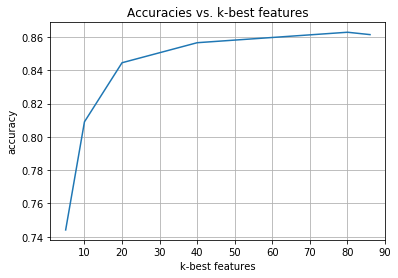

In [5]:
import pandas as pd
import pickle
import numpy as np
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.pipeline import Pipeline
import xgboost as xgb
import pickle
import time
from sklearn.externals import joblib
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

tcontext = 120
best_accuracy = 0
best_k = 5
k_features = [5, 10, 20, 40, 80, 86]
accuracies = list()

for k in k_features:


    features = np.load('features_tcontext_' + str(tcontext) + '_frameSize_1024.npz')
    features = features['a']
    features += np.finfo(np.float32).eps


    #features = features[:10000,:]
    labels = features[:,-1].astype(int)
    features = features[:, :features.shape[1] - 1]



    with open("features_length.txt", 'r') as f:
        features_length = [line.rstrip('\n') for line in f]

    features_names = list()
    for i in features_length:
        marker = i.find(':')
        f_name = i[:marker]
        values = int(i[marker+2:])
        for j in range(values):
            features_names.append(f_name + str('_')+ str(j))

    imputer = SimpleImputer()
    features = imputer.fit_transform(features)

    le = preprocessing.LabelEncoder()
    labels = le.fit_transform(labels)
    
    features_train, features_val, labels_train, labels_val = train_test_split(features, labels, test_size=0.2, random_state = 42)
    features_train_df = pd.DataFrame(data = features_train, columns = features_names)
    features_val_df = pd.DataFrame(data = features_val, columns = features_names)
    
    estimators = [('scale', preprocessing.StandardScaler()),
                      ('anova_filter', SelectKBest(f_classif, k=k)),
                      ('svm', svm.SVC(decision_function_shape='ovo'))]
    
    selector = SelectKBest(f_classif, k=k)
    selector.fit(features_train_df, labels_train)
    # Get columns to keep
    cols = selector.get_support(indices=True)
    cols = [features_names[i] for i in cols]
    
    clf_svm = Pipeline(estimators)
    
    start = time.time()

    clf_svm.fit(features_train, labels_train)
    pred_svm = clf_svm.predict(features_val)
    
    model_filename = './tcontext_ '+ str(tcontext) + '/models/svm/svm_' + str(k)  + '_best_features.sav'
    joblib.dump(clf_svm, open(model_filename, 'wb'))
    
    end = time.time()
    elapsed_time = end-start

    F = open('./tcontext_'+ str(tcontext) +'/results/svm/results_kBestFeatures_' + str(k) +  '.txt','w') 
    F.write('Model trained in: ' + str(int(elapsed_time/60)) + ' minutes and ' + str(round(elapsed_time%60, 2)) + ' seconds \n\n')
    F.write('K Best Features using f_classif: ' + str(k) + '\n\n')
    F.write('Best features: ' + str(cols) + '\n\n')
    F.write('Confusion matrix: \n\n')
    F.write(str(confusion_matrix(labels_val,pred_svm)))
    F.write('\n\n')
    F.write('Classification report: \n\n')
    F.write(str(classification_report(labels_val,pred_svm)))
    F.write('\n\n')
    F.write('Accuracy: ' + str(accuracy_score(labels_val, pred_svm)))
    F.close()
    
    if (accuracy_score(labels_val, pred_svm) > best_accuracy):
        best_accuracy = accuracy_score(labels_val, pred_svm)
        best_k = k
    accuracies.append(accuracy_score(labels_val, pred_svm))
    print(str(k) + '_best_features: accuracy =  ' + str(accuracy_score(labels_val, pred_svm)))

fig = plt.figure()
ax = plt.subplot(111)
plt.plot(k_features, accuracies)
plt.xlabel('k-best features')
plt.ylabel('accuracy')
plt.title('Accuracies vs. k-best features')
ax.grid('on')
plt.savefig('./tcontext_' + str(tcontext) + '/results/svm/accuracies.png', bbox_inches='tight')

print(str(best_k) + '_best_features presented the best accuracy: ' + str(best_accuracy))
F_best = open('./tcontext_' + str(tcontext) + '/results/svm/best_svm_model.txt','w')
F_best.write(str(best_k) + '_best_features presented the best accuracy: ' + str(best_accuracy))
F_best.close()

learning rate = 0.01 and 5_best_features: accuracy =  0.7461902775392015
learning rate = 0.1 and 5_best_features: accuracy =  0.7710731025005522
learning rate = 0.2 and 5_best_features: accuracy =  0.7783858064832765
learning rate = 0.3 and 5_best_features: accuracy =  0.7788029741601433
learning rate = 0.5 and 5_best_features: accuracy =  0.7780667959068489
learning rate = 0.7 and 5_best_features: accuracy =  0.7771097641775662
learning rate = 1 and 5_best_features: accuracy =  0.7726190768324703
learning rate = 0.01 and 10_best_features: accuracy =  0.7909989938897205
learning rate = 0.1 and 10_best_features: accuracy =  0.8301882162400923
learning rate = 0.2 and 10_best_features: accuracy =  0.8381880199258914
learning rate = 0.3 and 10_best_features: accuracy =  0.841255429314618
learning rate = 0.5 and 10_best_features: accuracy =  0.840740104537312
learning rate = 0.7 and 10_best_features: accuracy =  0.8408382616377512
learning rate = 1 and 10_best_features: accuracy =  0.836470

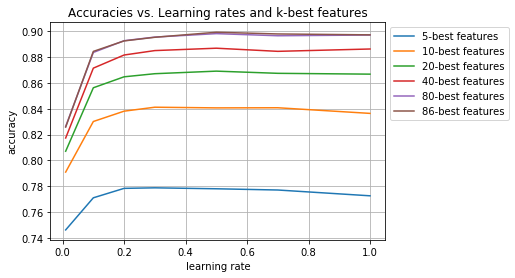

In [3]:
import pandas as pd
import pickle
import numpy as np
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.pipeline import Pipeline
import xgboost as xgb
import pickle
import time
from sklearn.externals import joblib
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

tcontext = 120
best_accuracy = 0
best_k = 5
best_lr = 0.1
k_features = [5, 10, 20, 40, 80, 86]
for k in k_features:

    features = np.load('features_tcontext_' + str(tcontext) + '_frameSize_1024.npz')

    features = features['a']
    features += np.finfo(np.float32).eps


    #features = features[:1000,:]
    labels = features[:,-1].astype(int)
    features = features[:, :features.shape[1] - 1]



    with open("features_length.txt", 'r') as f:
        features_length = [line.rstrip('\n') for line in f]

    features_names = list()
    for i in features_length:
        marker = i.find(':')
        f_name = i[:marker]
        values = int(i[marker+2:])
        for j in range(values):
            features_names.append(f_name + str('_')+ str(j))

    imputer = SimpleImputer()
    features = imputer.fit_transform(features)

    le = preprocessing.LabelEncoder()
    labels = le.fit_transform(labels)
    
    features_train, features_val, labels_train, labels_val = train_test_split(features, labels, test_size=0.2, random_state = 42)
    
    features_train_df = pd.DataFrame(data = features_train, columns = features_names)
    features_val_df = pd.DataFrame(data = features_val, columns = features_names)
    selector = SelectKBest(f_classif, k=k)
    selector.fit(features_train_df, labels_train)
    # Get columns to keep
    cols = selector.get_support(indices=True)
    cols = [features_names[i] for i in cols]
    

    
    
    learning_rates = [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 1]
    accuracies = list()
    for lr in learning_rates:
        start = time.time()

        estimators = [("scale", preprocessing.StandardScaler()),
                      ('anova_filter', SelectKBest(f_classif, k=k)),
                      ('xgb', xgb.XGBClassifier(max_depth=5, n_estimators=300, learning_rate=lr))]

        clf_xgb = Pipeline(estimators)

        clf_xgb.fit(features_train, labels_train)
        pred_xgb = clf_xgb.predict(features_val)

        model_filename = './tcontext_' + str(tcontext) + '/models/xgb/xgb_learningRate_'+ str(lr) + '_kBestFeatures_' + str(k) + '.sav'
        joblib.dump(clf_xgb, open(model_filename, 'wb'))

        end = time.time()
        elapsed_time = end-start

        F = open('./tcontext_'+ str(tcontext) +'/results/xgb/results_learningRate_'+ str(lr) + '_kBestFeatures_' + str(k) +  '.txt','w') 
        F.write('Model trained in: ' + str(int(elapsed_time/60)) + ' minutes and ' + str(round(elapsed_time%60, 2)) + ' seconds \n\n')
        F.write('K Best Features using f_classif: ' + str(k) + ' and a learning rate of: '+ str(lr) +'\n\n')
        F.write('Best features: ' + str(cols) + '\n\n')
        F.write('Confusion matrix: \n\n')
        F.write(str(confusion_matrix(labels_val,pred_xgb)))
        F.write('\n\n')
        F.write('Classification report: \n\n')
        F.write(str(classification_report(labels_val,pred_xgb)))
        F.write('\n\n')
        F.write('Accuracy: ' + str(accuracy_score(labels_val, pred_xgb)))
        F.close()
        
        if (accuracy_score(labels_val, pred_xgb) > best_accuracy):
            best_accuracy = accuracy_score(labels_val, pred_xgb)
            best_k = k
            best_lr = lr
        accuracies.append(accuracy_score(labels_val, pred_xgb))
        print('learning rate = ' + str(lr) + ' and ' + str(k) + '_best_features: accuracy =  ' + str(accuracy_score(labels_val, pred_xgb)))
    plt.plot(learning_rates, accuracies, label=str(k)+ '-best features')

legend = ax.legend(bbox_to_anchor=(1, 1))
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.title('Accuracies vs. Learning rates and k-best features')
ax.grid('on')
plt.savefig('./tcontext_'+ str(tcontext) +'/results/xgb/accuracies.png', bbox_inches='tight')
print('\nlearning rate = ' + str(best_lr) + ' and ' + str(best_k) + '_best_features presented the best accuracy: ' + str(best_accuracy))
F_best = open('./tcontext_'+ str(tcontext) +'/results/xgb/best_xgb_model.txt','w')
F_best.write('learning rate = ' + str(best_lr) + ' and ' + str(best_k) + '_best_features presented the best accuracy: ' + str(best_accuracy))
F_best.close()




